In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


x = np.linspace(-10., 10., 1000)

#x2 = x*np.random.rand(1000) + 10
#x3 = x*np.random.rand(1000) + 10

"""
x1 = x*np.random.rand(1000)
x2 = x*np.random.rand(1000) + 10
x3 = x*np.random.rand(1000) - 10
"""

xt = np.hstack((x,x))

In [22]:
max_iterations = 10
pi = np.array([1/4, 1/4, 1/4, 1/4])
mu = np.array([-3,0,3,6])
var = np.array([2.,2.5,3.5,4.5])
r = np.zeros((len(xt), 4))

[[0.07690417 0.18685298 0.38301003 0.35323282]
 [0.07682041 0.18667693 0.38296655 0.3535361 ]
 [0.07673682 0.18650119 0.3829229  0.35383909]
 ...
 [0.05410325 0.13070648 0.33995197 0.4752383 ]
 [0.05413049 0.13075153 0.33994926 0.47516871]
 [0.05415785 0.13079679 0.33994664 0.47509872]]


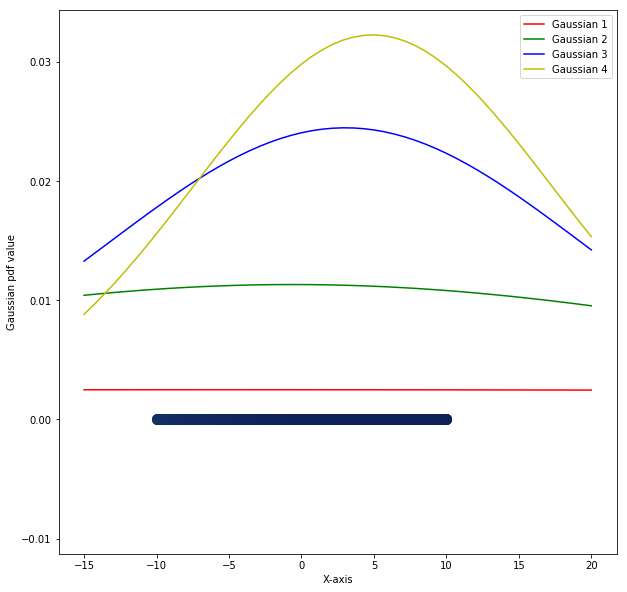

In [25]:
gauss1 = norm(loc=mu[0], scale=var[0])
gauss2 = norm(loc=mu[1], scale=var[1])
gauss3 = norm(loc=mu[2], scale=var[2])
gauss4 = norm(loc=mu[3], scale=var[3])

    # E-Step
for c,g,p in zip(range(4), [gauss1, gauss2, gauss3, gauss4], pi):
    r[:,c] = p*g.pdf(xt[:])

for i in range(len(r)):
    r[i,:] /= np.sum(r[i,:])

print(r)

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for i in range(len(r)):
    ax0.scatter(xt[i],0,c=r[i,:],s=100) 

for g,c in zip([gauss1.pdf(np.linspace(-15,20)),gauss2.pdf(np.linspace(-15,20)),gauss3.pdf(np.linspace(-15,20)),gauss4.pdf(np.linspace(-15,20))],['r','g','b','y']):
    ax0.plot(np.linspace(-15,20),g,c=c,zorder=0)

ax0.set_xlabel('X-axis')
ax0.set_ylabel('Gaussian pdf value')
ax0.legend(['Gaussian 1', 'Gaussian 2', 'Gaussian 3', 'Gaussian 4'])

plt.show()

    # M-Step
mc = np.sum(r, axis=0)
pi = mc/len(xt)
mu = np.sum(r*np.vstack((xt, xt, xt, xt)).T, axis=0)/mc
var = []

for c in range(len(pi)):
    var.append(np.sum(np.dot(r[:,c]*(xt[i] - mu[c]).T, r[:,c]*(xt[i] - mu[c])))/mc[c])

[[5.70833479e-01 7.00321194e-02 1.50584225e-01 2.08550176e-01]
 [5.74410384e-01 7.02609085e-02 1.49457723e-01 2.05870984e-01]
 [5.77954854e-01 7.04862986e-02 1.48335582e-01 2.03223266e-01]
 ...
 [1.99914050e-09 7.50563746e-04 2.07571498e-01 7.91677937e-01]
 [1.88380446e-09 7.30975216e-04 2.06350406e-01 7.92918617e-01]
 [1.77496741e-09 7.11861402e-04 2.05132419e-01 7.94155718e-01]]


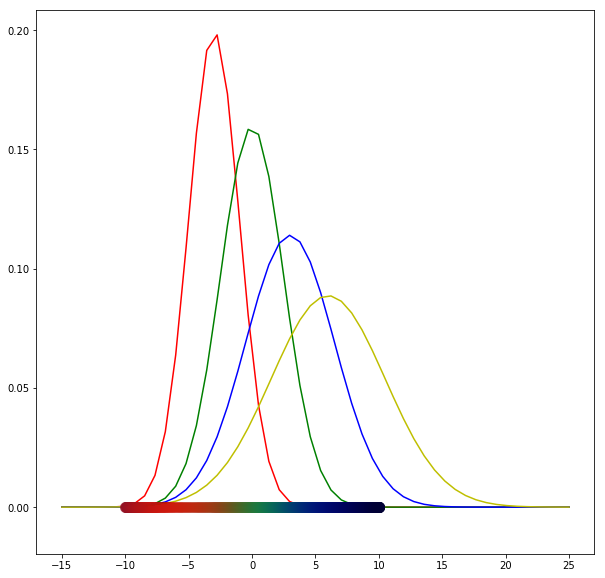

[0.33471025 0.18561672 0.23370616 0.24596687]
[-5.36775593 -0.6346697   3.01942956  4.9144382 ]
[159.89562377788096, 35.243868705087976, 16.303731536389954, 12.36505264170075]
[[0.07690417 0.18685298 0.38301003 0.35323282]
 [0.07682041 0.18667693 0.38296655 0.3535361 ]
 [0.07673682 0.18650119 0.3829229  0.35383909]
 ...
 [0.05410325 0.13070648 0.33995197 0.4752383 ]
 [0.05413049 0.13075153 0.33994926 0.47516871]
 [0.05415785 0.13079679 0.33994664 0.47509872]]


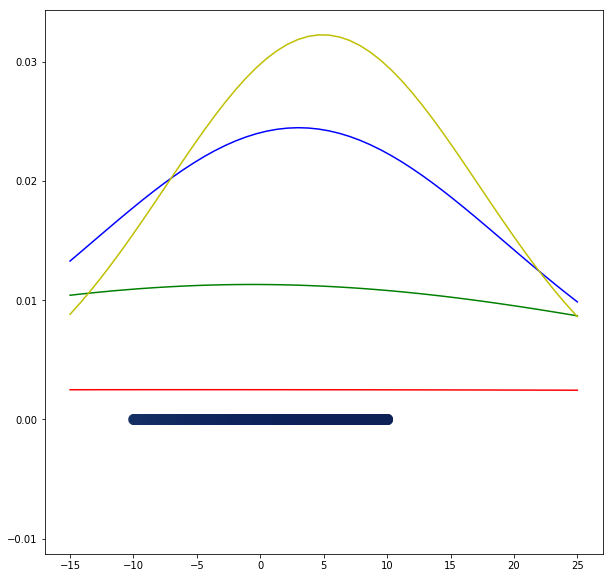

[0.05675051 0.14095017 0.35669054 0.44560877]
[-0.63681091 -0.64102578 -0.21971946  0.45973936]
[6.5284236000294165, 16.206701669107854, 37.309424564674934, 40.85544132621991]
[[0.10270533 0.24325237 0.30524688 0.34879542]
 [0.10308413 0.24325252 0.30507249 0.34859086]
 [0.10346335 0.24325227 0.30489808 0.3483863 ]
 ...
 [0.07979909 0.24066635 0.31569014 0.36384442]
 [0.07945644 0.24063516 0.31585833 0.36405008]
 [0.07911448 0.24060351 0.31602638 0.36425563]]


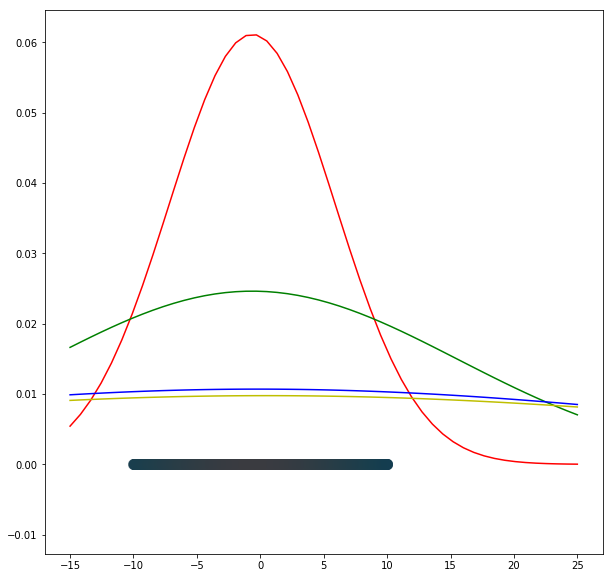

[0.17584112 0.23630796 0.27427898 0.31357194]
[-0.31762125  0.00471688  0.08487583  0.10031695]
[19.9198885794304, 23.617360505486733, 27.085658740865117, 30.87975070766751]
[[0.2174938  0.25362741 0.26197884 0.26689996]
 [0.2175291  0.25363579 0.26196554 0.26686957]
 [0.21756433 0.25364415 0.26195227 0.26683925]
 ...
 [0.21460235 0.25425505 0.26314469 0.26799792]
 [0.21456153 0.25424772 0.26316024 0.26803051]
 [0.21452065 0.25424037 0.26317581 0.26806317]]


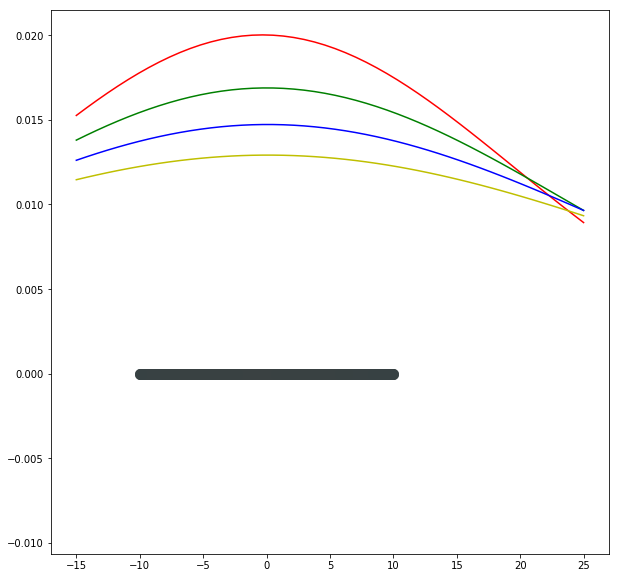

[0.22241995 0.25519867 0.26013713 0.26224425]
[-0.02260083  0.00414197  0.00776061  0.00743973]
[22.346760103927192, 25.498866326051857, 25.97386440691621, 26.187559588820406]
[[0.24425273 0.25124646 0.25211357 0.25238724]
 [0.24427134 0.25124253 0.25210684 0.25237929]
 [0.24428992 0.2512386  0.25210012 0.25237135]
 ...
 [0.24408832 0.25128957 0.25217705 0.25244506]
 [0.24406935 0.25129359 0.25218391 0.25245315]
 [0.24405034 0.25129762 0.2521908  0.25246125]]


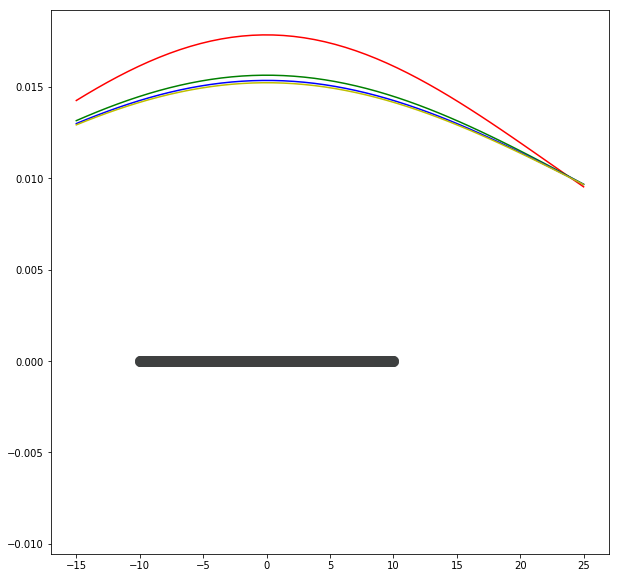

[0.24730017 0.25060224 0.25101404 0.25108355]
[-0.0013738   0.00034388  0.00051589  0.00049413]
[24.737623930455293, 25.058536860755094, 25.098918354286813, 25.10601865426566]


In [27]:
class GMM1D:
    """Apply GMM to 1D Data"""
    
    def __init__(self, X, max_iterations):
        """Initialize data and max_iterations"""
        self.X = X
        self.max_iterations = max_iterations
        
    def run(self):
        """Initialize parameters mu, var, pi"""
        self.pi = np.array([1/4, 1/4, 1/4, 1/4])
        self.mu = np.array([-3,0,3,6])
        self.var = np.array([2.,2.5,3.5,4.5])
        #self.mu = np.array([5,8,1])
        #self.var = np.array([5,3,1])
        
        r = np.zeros((len(self.X), 4))
        
        for itr in range(self.max_iterations):
    
            gauss1 = norm(loc=self.mu[0], scale=self.var[0])
            gauss2 = norm(loc=self.mu[1], scale=self.var[1])
            gauss3 = norm(loc=self.mu[2], scale=self.var[2])
            gauss4 = norm(loc=self.mu[3], scale=self.var[3])
            
            # E-Step
            for c,g,p in zip(range(4), [gauss1, gauss2, gauss3, gauss4], self.pi):
                r[:,c] = p*g.pdf(xt[:])

            for i in range(len(r)):
                r[i,:] /= np.sum(r[i,:])
            
            print(r)

            fig = plt.figure(figsize=(10,10))
            ax0 = fig.add_subplot(111)

            for i in range(len(r)):
                ax0.scatter(xt[i],0,c=r[i,:],s=100) 

            for g,c in zip([gauss1.pdf(np.linspace(-15,25)),gauss2.pdf(np.linspace(-15,25)),gauss3.pdf(np.linspace(-15,25)),gauss4.pdf(np.linspace(-15,25))],['r','g','b','y']):
                ax0.plot(np.linspace(-15,25),g,c=c,zorder=0)

            plt.show()

            # M-Step
            mc = np.sum(r, axis=0)
            self.pi = mc/len(self.X)
            self.mu = np.sum(r*np.vstack((self.X, self.X, self.X, self.X)).T, axis=0)/mc
            self.var = []

            for c in range(len(self.pi)):
                self.var.append(np.sum(np.dot(r[:,c]*(self.X[i] - self.mu[c]).T, r[:,c]*(self.X[i] - self.mu[c])))/mc[c])

            print(self.pi)
            print(self.mu)
            print(self.var)
            
gmm = GMM1D(xt, 5)
gmm.run()

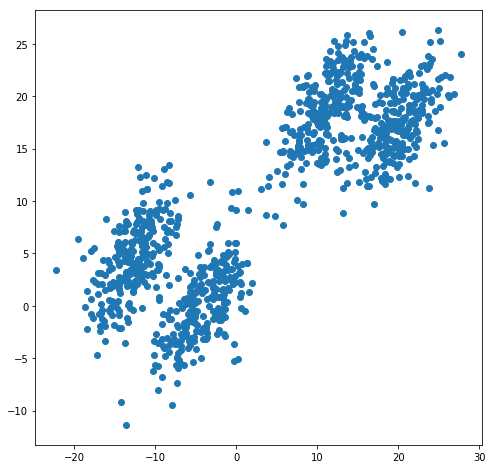

In [28]:
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import multivariate_normal

X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=1000,centers=4)

X = np.dot(X, np.random.RandomState(0).randn(2,2))
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [33]:
class GMM2D:
    """Apply GMM to 2D data"""
    
    def __init__(self, num_clusters, max_iterations):

        """Initialize num_clusters(K) and max_iterations for the model"""

        self.num_clusters = num_clusters
        self.max_iterations = max_iterations

    def run(self, X):

        """Initialize parameters and run E and M step storing log-likelihood value after every iteration"""

        self.pi = np.ones(self.num_clusters)/self.num_clusters
        self.mu = np.random.randint(min(X[:, 0]), max(X[:, 0]), size=(self.num_clusters, len(X[0])))
        self.cov = np.zeros((self.num_clusters, len(X[0]), len(X[0])))

        for n in range(len(self.cov)):
            np.fill_diagonal(self.cov[n], 5)

        # reg_cov is used for numerical stability i.e. to check singularity issues in covariance matrix 
        self.reg_cov = 1e-6*np.identity(len(X[0]))

        x,y = np.meshgrid(np.sort(X[:,0]), np.sort(X[:,1]))
        self.XY = np.array([x.flatten(), y.flatten()]).T
        # Plot the data and the initial model

        fig0 = plt.figure(figsize=(10,10))
        ax0 = fig0.add_subplot(111)
        ax0.scatter(X[:, 0], X[:, 1])
        ax0.set_title("Initial State")

        for m, c in zip(self.mu, self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m, cov=c)
            ax0.contour(np.sort(X[:, 0]), np.sort(X[:, 1]), multi_normal.pdf(self.XY).reshape(len(X), len(X)), colors = 'black', alpha = 0.3)
            ax0.scatter(m[0], m[1], c='grey', zorder=10, s=100)
        
        fig0.savefig('GMM2D Initial State.png')
        plt.show()
        self.log_likelihoods = []

        for iters in range(self.max_iterations):
            # E-Step

            self.ric = np.zeros((len(X), len(self.mu)))

            for pic, muc, covc, r in zip(self.pi, self.mu, self.cov, range(len(self.ric[0]))):
                covc += self.reg_cov
                mn = multivariate_normal(mean=muc, cov=covc)
                self.ric[:, r] = pic*mn.pdf(X)

            for r in range(len(self.ric)):
                self.ric[r, :] = self.ric[r, :] / np.sum(self.ric[r, :])

            # M-step

            self.mc = np.sum(self.ric, axis=0)
            self.pi = self.mc/np.sum(self.mc)
            self.mu = np.dot(self.ric.T, X) / self.mc.reshape(self.num_clusters,1)

            self.cov = []

            for r in range(len(self.pi)):
                covc = 1/self.mc[r] * (np.dot( (self.ric[:, r].reshape(len(X), 1)*(X-self.mu[r]) ).T, X - self.mu[r]) + self.reg_cov)
                self.cov.append(covc)

            self.cov = np.asarray(self.cov)
            self.log_likelihoods.append(np.log(np.sum([self.pi[r]*multivariate_normal(self.mu[r], self.cov[r] + self.reg_cov).pdf(X) for r in range(len(self.pi))])))

            fig1 = plt.figure(figsize=(10,10))
            ax1 = fig1.add_subplot(111)
            ax1.scatter(X[:, 0], X[:, 1])
            ax1.set_title("Iteration " + str(iters))

            for m, c in zip(self.mu, self.cov):
                c += self.reg_cov
                multi_normal = multivariate_normal(mean=m, cov=c)
                ax1.contour(np.sort(X[:, 0]), np.sort(X[:, 1]), multi_normal.pdf(self.XY).reshape(len(X), len(X)), colors = 'black', alpha = 0.3)
                ax1.scatter(m[0], m[1], c='grey', zorder=10, s=100)
            
            fig1.savefig("GMM2D Iter " + str(iters) + ".png")
            plt.show()

        fig2 = plt.figure(figsize=(10,10))
        ax2 = fig2.add_subplot(111)
        ax2.plot(range(0, iters+1, 1), self.log_likelihoods)
        ax2.set_title('Log Likelihood Values')
        fig2.savefig('GMM2D Log Likelihood.png')
        plt.show()

    def predict(self, Y):

        """Predicting cluster for new samples in array Y"""

        predictions = []

        for pic, m, c in zip(self.pi, self.mu, self.cov):
            prob = pic*multivariate_normal(mean=m, cov=c).pdf(Y)
            predictions.append([prob])

        predictions = np.asarray(predictions).reshape(len(Y), self.num_clusters)
        predictions = np.argmax(predictions, axis=1)

        fig2 = plt.figure(figsize=(10,10))
        ax2 = fig2.add_subplot(111)
        ax2.scatter(X[:, 0], X[:, 1], c='c')
        ax2.scatter(Y[:, 0], Y[:, 1], marker='*', c='k', s=150, label = 'New Data')
        ax2.set_title("Predictions on New Data")

        colors = ['r', 'b', 'g', 'y']

        for m, c, col, i in zip(self.mu, self.cov, colors, range(len(colors))):
    #         c += reg_cov
            multi_normal = multivariate_normal(mean=m, cov=c)
            ax2.contour(np.sort(X[:, 0]), np.sort(X[:, 1]), multi_normal.pdf(self.XY).reshape(len(X), len(X)), colors = 'black', alpha = 0.3)
            ax2.scatter(m[0], m[1], marker='o', c=col, zorder=10, s=150, label = 'Centroid ' + str(i+1))

        for i in range(len(Y)):
            ax2.scatter(Y[i, 0], Y[i, 1], marker='*', c=colors[predictions[i]], s=150)

        ax2.set_xlabel('X-axis')
        ax2.set_ylabel('Y-axis')
        ax2.legend()
        fig2.savefig('GMM2D Predictions.png')
        plt.show()

        return predictions

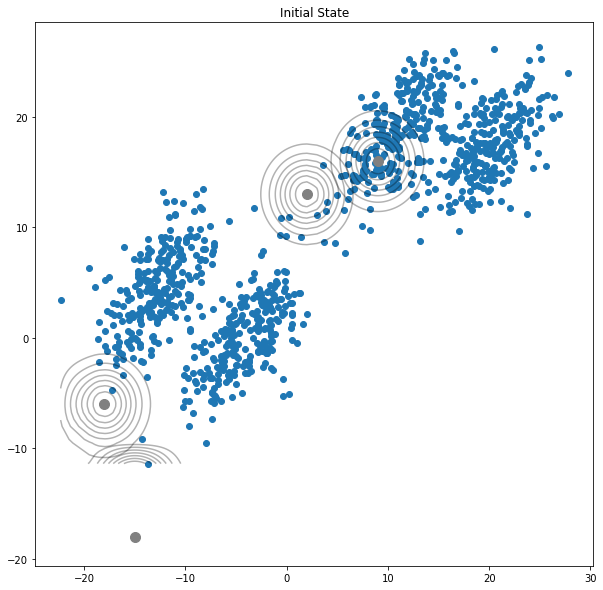

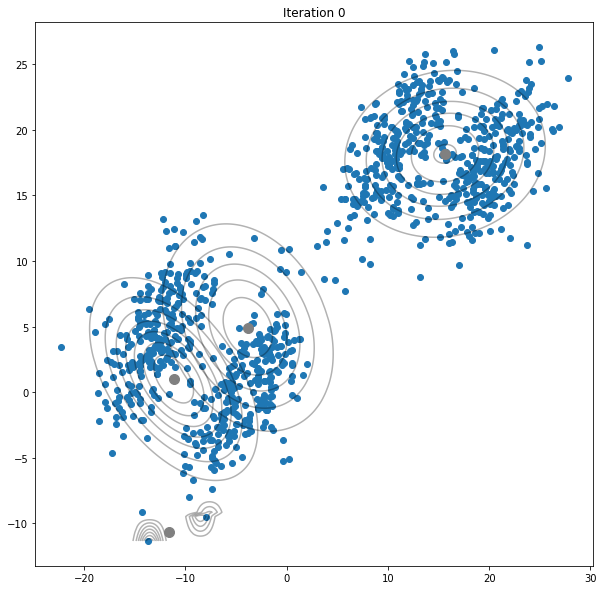

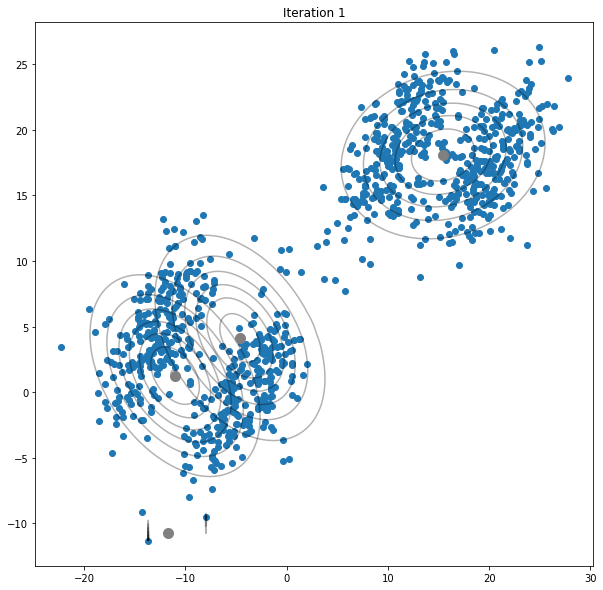

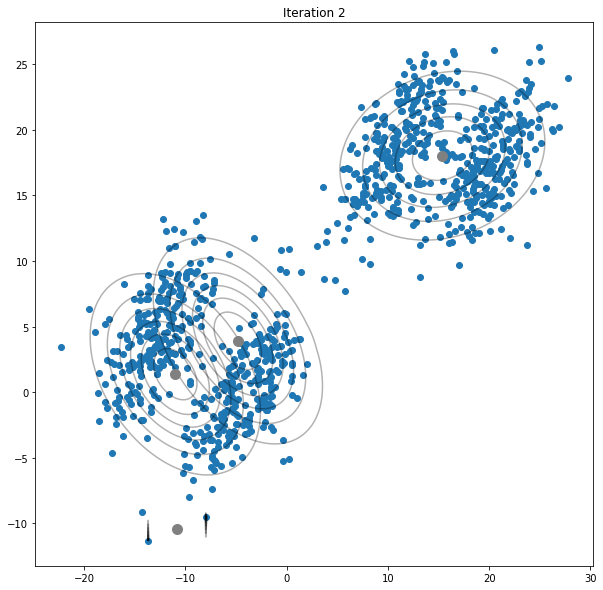

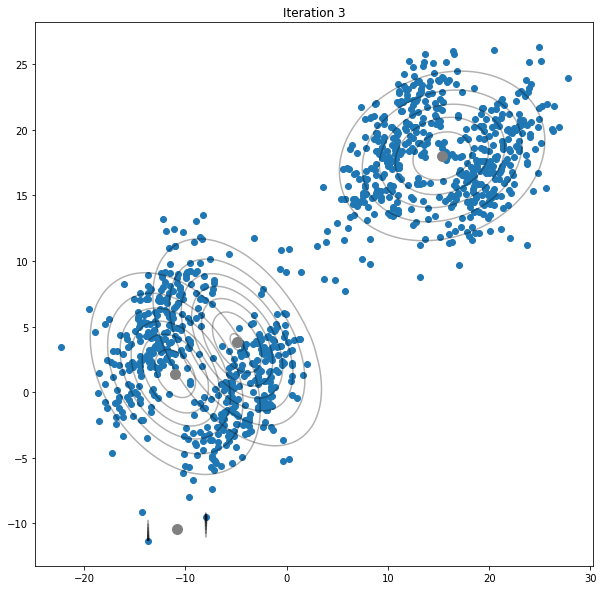

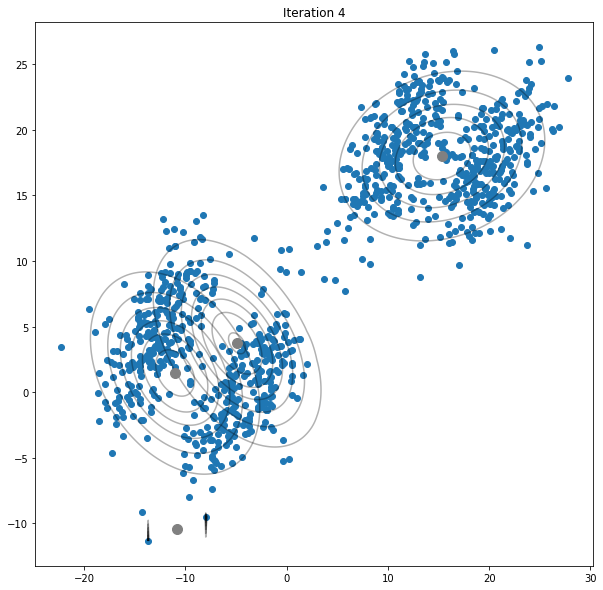

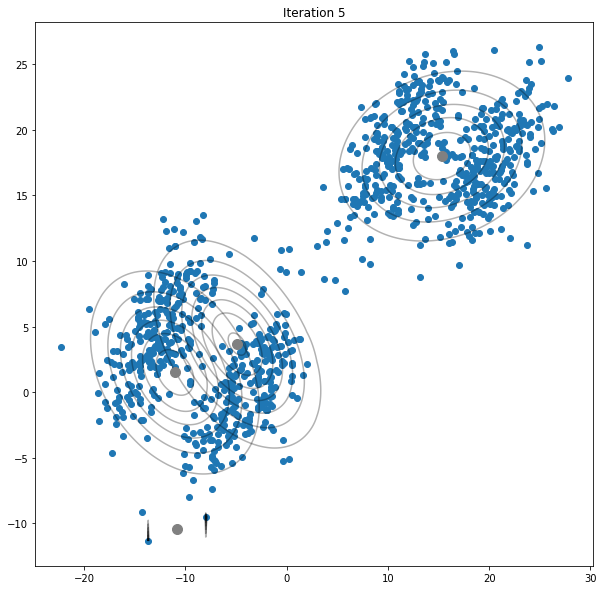

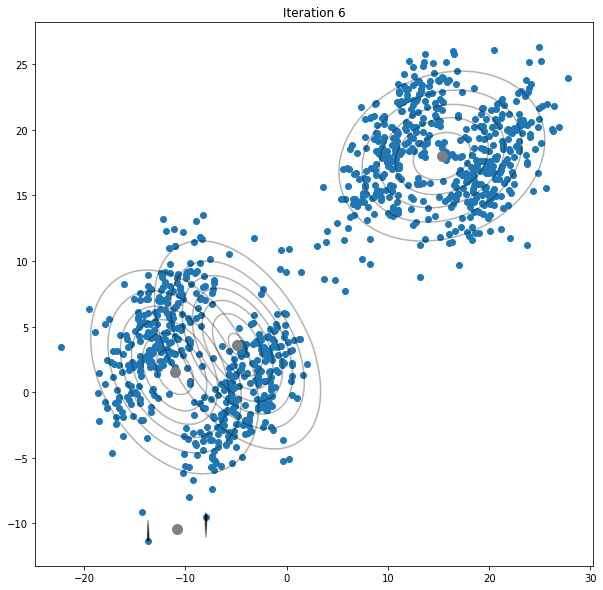

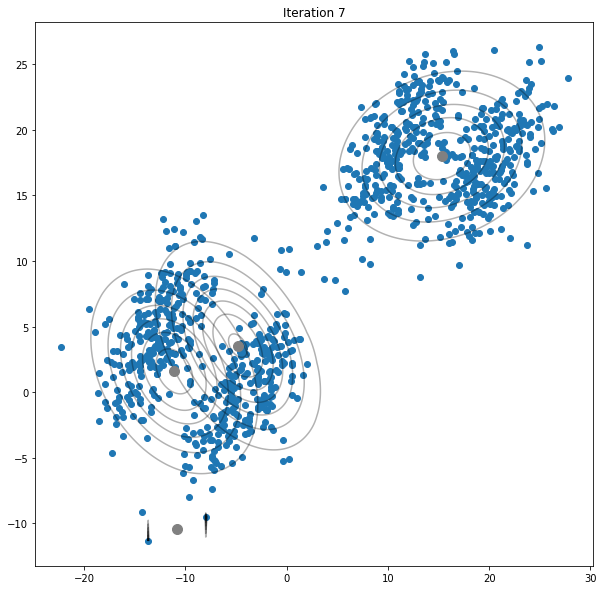

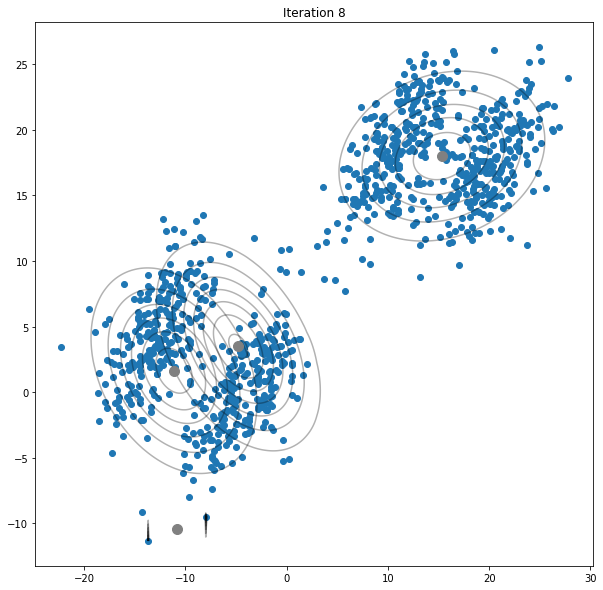

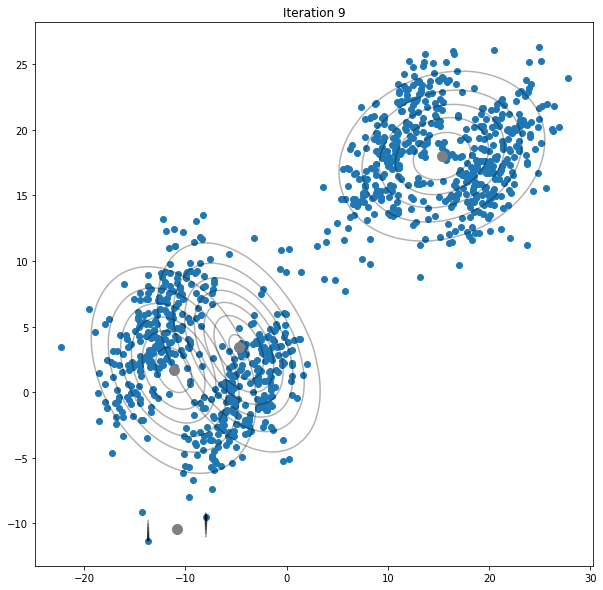

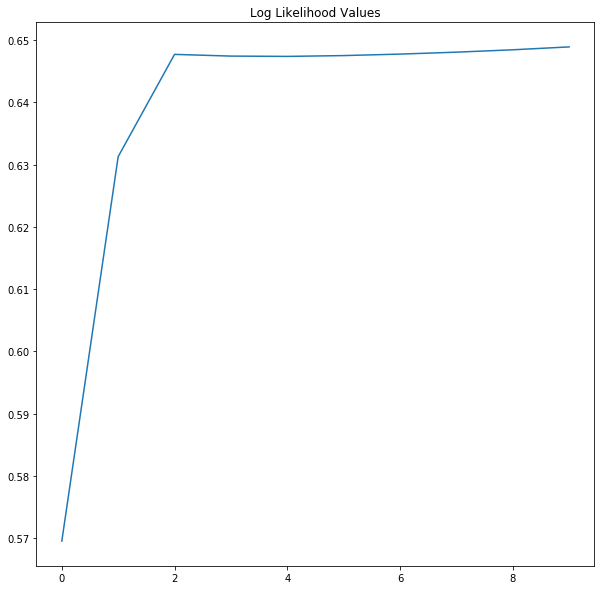

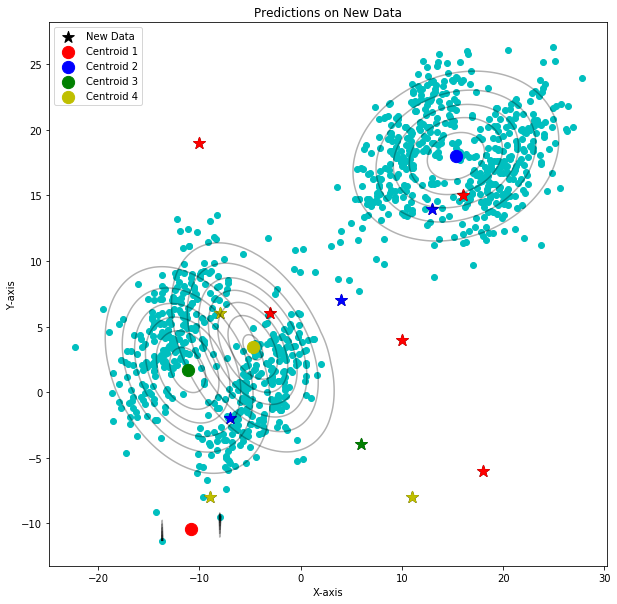

array([0, 0, 0, 0, 0, 2, 3, 1, 3, 3, 1, 1])

In [34]:
y = np.random.randint(-10, 20, size=(12, 2))
gmm2d = GMM2D(num_clusters=4, max_iterations=10)
gmm2d.run(X)
gmm2d.predict(y)

In [35]:
from sklearn.mixture import GaussianMixture

X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=1000,centers=4)
X = np.dot(X, np.random.RandomState(0).randn(2,2))

GMM = GaussianMixture(n_components=4)
GMM.fit(X)
Y = np.random.randint(-10, 20, size=(1, 2))
print(GMM.means_, GMM.predict_proba(Y))

[[ 15.37723111  18.04908255]
 [-11.0358163    7.07673391]
 [ -4.00116193   0.23085932]
 [-14.18400286   2.44076302]] [[1.37969672e-01 8.61780437e-01 3.97553550e-12 2.49891373e-04]]
